HW 03

In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not.

In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mutual_info_score, accuracy_score

In [ ]:
df = pd.read_csv('../data/bank-full.csv', sep=';')

In [43]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [44]:
# Normalize names of columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

columns = [
    "age",
    "job",
    "marital",
    "education",
    "balance",
    "housing",
    "contact",
    "day",
    "month",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "poutcome",
    "y"
]

categorical_columns = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# We will only be using these columns:
df = df[columns]


In [45]:
# Deal with missing values
df.isnull().sum()



age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
df.columns


Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [47]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [48]:
### Question 1
# What is the most frequent observation (mode) for the column `education`?

df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [49]:
### Question 2

# Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
# In a correlation matrix, you compute the correlation coefficient between every pair of features.

# What are the two features that have the biggest correlation?


In [50]:
df.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [51]:
# convert  y to 1/0s

df.y = (df.y == 'yes').astype(int)


/tmp/ipykernel_1927/598574821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.y = (df.y == 'yes').astype(int)


In [52]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [53]:
# Setup validation framework

from sklearn.model_selection import train_test_split

# random_state so results are reproducable
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# we get 20% of original dataframe
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)


len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [54]:
# index are shuffeled, unshuffle them.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [55]:
# Now get 'y' vector, "term deposit"
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values



In [56]:
data_numerical = df.copy()
data_numerical = data_numerical[numerical_columns]
data_numerical.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [57]:
data_numerical.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


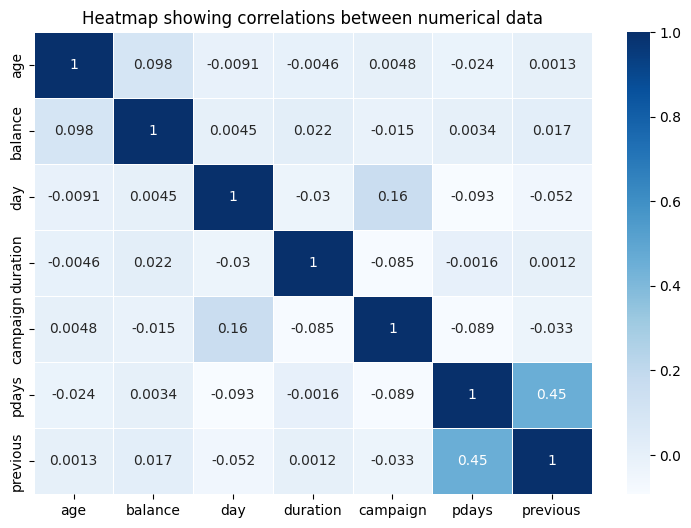

In [58]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numerical.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [59]:
data_numerical.corr().unstack().sort_values(ascending=False)

age       age         1.000000
balance   balance     1.000000
day       day         1.000000
campaign  campaign    1.000000
duration  duration    1.000000
pdays     pdays       1.000000
previous  previous    1.000000
pdays     previous    0.454820
previous  pdays       0.454820
day       campaign    0.162490
campaign  day         0.162490
balance   age         0.097783
age       balance     0.097783
balance   duration    0.021560
duration  balance     0.021560
previous  balance     0.016674
balance   previous    0.016674
campaign  age         0.004760
age       campaign    0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

In [60]:
mutual_info_score(df_train.y, df_train.balance)

np.float64(0.11661461717469258)

In [61]:

def mutual_info_term_deposit_score(series):
    return mutual_info_score(series, df_train.y)


In [62]:


mi = df_train[categorical_columns].apply(mutual_info_term_deposit_score)
mi.sort_values(ascending=False).to_frame(name='MI')

,MI
poutcome,0.029533
month,0.025090
contact,0.013356
housing,0.010343
job,0.007316
education,0.002697
marital,0.002050


In [63]:
del df_train['y']
del df_val['y']
del df_test['y']

In [64]:
# QUestion 4

from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train[categorical_columns+numerical_columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)


In [65]:
X_train = dv.fit_transform(train_dicts)

# same as above
#dv.fit(train_dicts)
#X_train = dv.transform(train_dicts)
X_train.shape

(27126, 47)

In [66]:
# don't need to fit since that was for the DictVectorizer object with the training set.
val_dicts = df_val[categorical_columns+numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)



Logistic Regression


In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [68]:
z = np.linspace(-5,5,51)

In [69]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

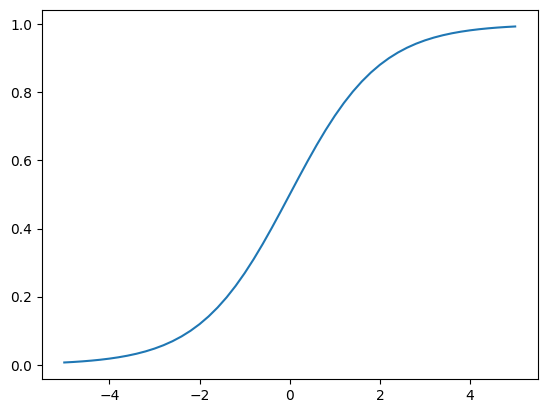

In [70]:
plt.plot(z, sigmoid(z))

In [71]:

def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result



In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [73]:
model.coef_[0].round(3)

array([ 1.000e-03,  0.000e+00, -7.800e-02,  2.540e-01,  8.300e-02,
       -1.313e+00,  9.000e-03,  4.000e-03, -4.440e-01, -2.510e-01,
       -5.300e-02, -2.290e-01, -1.460e-01, -8.310e-01,  9.800e-02,
       -2.440e-01, -2.640e-01, -3.320e-01, -8.000e-02,  2.650e-01,
       -2.920e-01, -1.290e-01,  2.880e-01, -1.460e-01,  3.300e-02,
       -1.730e-01, -3.520e-01, -4.760e-01, -1.490e-01, -1.300e-02,
       -7.110e-01,  3.900e-01, -3.260e-01, -1.162e+00, -1.044e+00,
        2.990e-01,  1.453e+00, -5.020e-01, -9.400e-01,  7.840e-01,
        7.950e-01, -1.000e-03, -7.840e-01, -5.800e-01,  1.500e+00,
       -1.112e+00,  5.000e-03])

In [74]:
# hard predictions (Exact Labels) known outcomes
model.predict(X_train)

array([0, 0, 0, ..., 0, 1, 0], shape=(27126,))

In [75]:
term_deposit = model.predict(X_val)
term_deposit

array([0, 0, 0, ..., 0, 0, 0], shape=(9042,))

In [76]:
accuracy = (y_val == term_deposit).mean()
accuracy.round(2)

np.float64(0.9)

In [77]:
# Q6

C = [0.01, 0.1, 1, 10, 100]


for c in C:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    model.predict(X_train)
    term_deposit = model.predict(X_val)
    accuracy = (y_val == term_deposit).mean()
    score = accuracy_score(y_val, term_deposit)

    print(f'{c} - Accuracy: {accuracy.round(3)} - Score Accuracy: {score}')


0.01 - Accuracy: 0.898 - Score Accuracy: 0.8979208139792081
0.1 - Accuracy: 0.901 - Score Accuracy: 0.9007962840079629
1 - Accuracy: 0.901 - Score Accuracy: 0.9009068790090687
10 - Accuracy: 0.901 - Score Accuracy: 0.9009068790090687
100 - Accuracy: 0.901 - Score Accuracy: 0.9006856890068569
